In [1]:
import warnings
warnings.filterwarnings(action="ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Users.csv

In [2]:
user=pd.read_csv("../Dataset/user.csv")

1. test  =  total 
2. relationship = information joining both the dataframes
3. user = information about the user
4. content = information about only the content

In [3]:
#user table analysis
user.head(5)

,user_id,user_age,gender,location,joining_date
0,user_45028@domain.com,40,M,Goa,2018-06-18
1,user_95235@domain.com,55,F,Andhra Pradesh,2019-09-17
2,user_44289@domain.com,38,F,Goa,2018-09-03
3,user_23708@domain.com,47,F,West Bengal,2020-11-15
4,user_40584@domain.com,24,M,Tamil Nadu,2018-02-06


In [4]:
print("The structure of the dataframe",user.shape)

The structure of the dataframe (13843, 5)


In [5]:
print("Statistics of gender, location and joining date")
user.drop('user_id',axis=1).describe(include='object')

Statistics of gender, location and joining date


,gender,location,joining_date
count,13843,13843,13843
unique,2,29,1188
top,M,Maharashtra,2018-05-17
freq,6958,2111,25


In [6]:
print("Statistics of users age")
user.describe(include=[np.number])

Statistics of users age


,user_age
count,13843.000000
mean,37.990248
std,12.958169
min,16.000000
25%,27.000000
50%,38.000000
75%,49.000000
max,60.000000


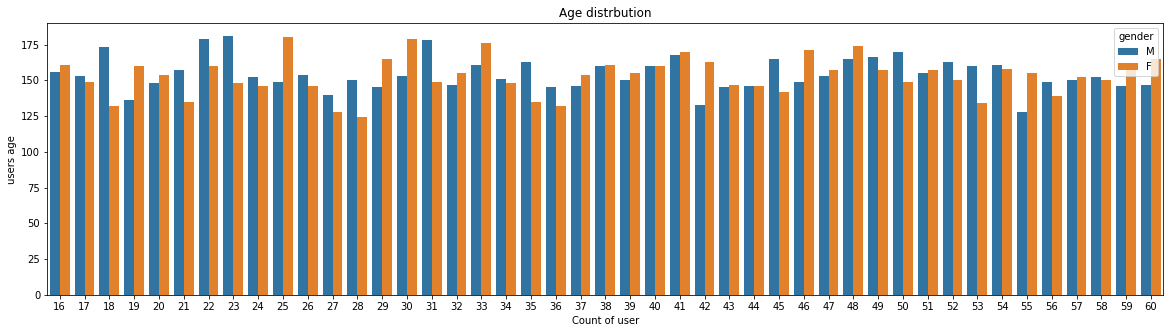

In [7]:
plt.figure(figsize =  (20,5))
sns.countplot(user['user_age'],hue =user['gender'],data = user)
plt.title("Age distrbution")
plt.xlabel('Count of user')
plt.ylabel('users age')
plt.show()

### what are the different locations from which the user accessed our content?

Total No. of locations from which the users accessed the content is  29


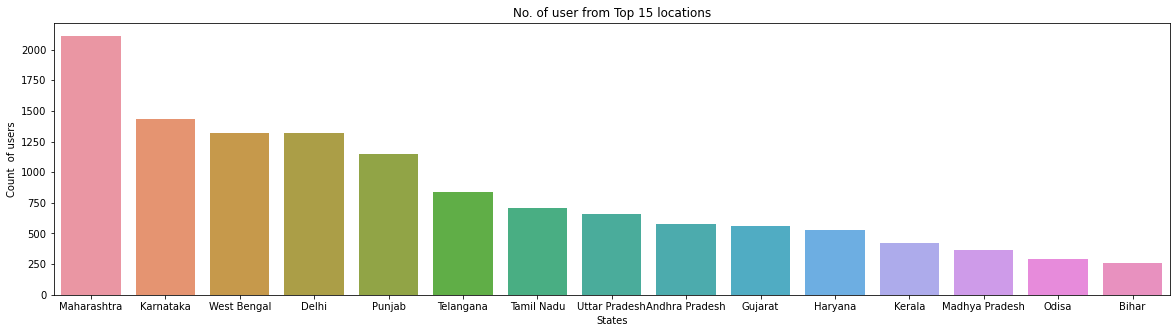

In [8]:
print ("Total No. of locations from which the users accessed the content is ", len(user['location'].unique()))
location = user['location'].value_counts(ascending= False)[:15].reset_index()
plt.figure(figsize=(20,5))
sns.barplot(location['index'],location['location'])
plt.title("No. of user from Top 15 locations")
plt.xlabel('States')
plt.ylabel('Count  of users')
plt.show()

## 2.  content.csv

In [9]:
content=pd.read_csv("../Dataset/content.csv")
# content table analysis
content.head(3)

,content_id,content_type,language,genre,duration,release_date,rating,episode_count,season_count
0,cont_475_19_32,series,english,drama,4980000,2018-07-01,10,32,19
1,cont_2185_15_21,series,english,drama,3000000,2016-03-29,4,21,15
2,cont_4857_13_28,series,tamil,comedy,3120000,2006-03-06,8,28,13


In [10]:
print("Statistical Information about the categorical columns content type, language, genre, release date")
content.drop('content_id',axis=1).describe(include='object')

Statistical Information about the categorical columns content type, language, genre, release date


,content_type,language,genre,release_date
count,48645,48645,48645,48645
unique,4,11,22,10471
top,series,hindi,drama,2012-12-27
freq,45261,23912,22991,17


In [11]:
print("Statistical Information about the numerical colums in such as duration,rating, episode count, season_count")
content.drop('content_id',axis=1).describe(include=[np.number])

Statistical Information about the numerical colums in such as duration,rating, episode count, season_count


,duration,rating,episode_count,season_count
count,4.864500e+04,48645.000000,48645.000000,48645.000000
mean,3.526825e+06,5.042163,16.216631,6.613033
std,9.114208e+05,3.092649,12.752946,6.151200
min,6.000000e+04,0.000000,0.000000,0.000000
25%,3.000000e+06,2.000000,6.000000,2.000000
50%,3.300000e+06,5.000000,13.000000,5.000000
75%,3.780000e+06,8.000000,24.000000,9.000000
max,1.110000e+07,10.000000,60.000000,44.000000


In [12]:
content['content_type'].value_counts()

series     45261
sports      3175
movies       159
teasers       50
Name: content_type, dtype: int64

### What are the top user rated contents of the ott platform ?

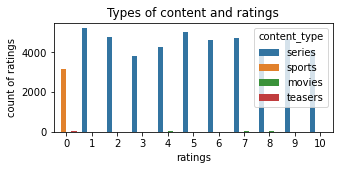

In [13]:
plt.figure(figsize=(5,2))
sns.countplot(x= 'rating',hue='content_type',data=content)
plt.title("Types of content and ratings")
plt.ylabel('count of ratings')
plt.xlabel('ratings')
plt.show()
plt.show()

### Analysis Based on the content type in the ott : -
1. Movies
2. Series
3. Sports
4. Teasers

###### a. Movies

In [14]:
top_movies_ratings = content[content['content_type'] == 'movies'].sort_values(by= 'rating', ascending=False)
top_movies_ratings = top_movies_ratings.reset_index(drop='index')
print("Total Number of movies " ,top_movies_ratings.shape[0])
top_movies_ratings.describe()

Total Number of movies  159


,duration,rating,episode_count,season_count
count,1.590000e+02,159.000000,159.0,159.0
mean,6.333962e+06,5.798742,0.0,0.0
std,2.315967e+06,2.794162,0.0,0.0
min,2.700000e+06,1.000000,0.0,0.0
25%,4.530000e+06,4.000000,0.0,0.0
50%,6.120000e+06,6.000000,0.0,0.0
75%,8.190000e+06,8.000000,0.0,0.0
max,1.080000e+07,10.000000,0.0,0.0


In [15]:
top_movies_ratings.drop(['content_type','content_id'],axis=1).describe(include='object')

,language,genre,release_date
count,159,159,159
unique,8,16,158
top,hindi,comedy,2017-11-27
freq,85,27,2


> ##### Movies
There are **Sixteen genres** of movies content in **Eight different languages** out of which half of them in **hindi** language"
----

###### b. Series

In [16]:
top_series_ratings = content[content['content_type'] == 'series'].sort_values(by= 'rating', ascending=False)
top_series_ratings = top_series_ratings.reset_index(drop='index')
print("Total Number of series" ,top_series_ratings.shape[0])
top_series_ratings.describe()

Total Number of series 45261


,duration,rating,episode_count,season_count
count,4.526100e+04,45261.000000,45261.000000,45261.000000
mean,3.430372e+06,5.398776,17.026049,7.037317
std,6.783476e+05,2.882986,12.806494,6.170425
min,2.400000e+06,1.000000,1.000000,1.000000
25%,2.940000e+06,3.000000,7.000000,3.000000
50%,3.300000e+06,5.000000,14.000000,5.000000
75%,3.660000e+06,8.000000,25.000000,9.000000
max,5.700000e+06,10.000000,60.000000,44.000000


In [17]:
top_series_ratings.drop(['content_type','content_id'],axis=1).describe(include='object')

,language,genre,release_date
count,45261,45261,45261
unique,11,6,10291
top,hindi,drama,2012-12-27
freq,22184,22980,17


> ##### Series 
There are series in **Eleven different languages** in **Six genres** are available
----

###### c. Sports

In [18]:
top_sports_ratings = content[content['content_type'] == 'sports'].sort_values(by= 'rating', ascending=False)
top_sports_ratings = top_sports_ratings.reset_index(drop='index')
print("Total Number of sports related content" ,top_sports_ratings.shape[0])
top_sports_ratings.describe(include=[np.number])

Total Number of sports related content 3175


,duration,rating,episode_count,season_count
count,3.175000e+03,3175.0,3175.000000,3175.0
mean,4.813209e+06,0.0,5.745512,1.0
std,1.883513e+06,0.0,4.188545,0.0
min,2.400000e+06,0.0,1.000000,1.0
25%,3.480000e+06,0.0,2.000000,1.0
50%,4.380000e+06,0.0,5.000000,1.0
75%,5.280000e+06,0.0,8.000000,1.0
max,1.110000e+07,0.0,20.000000,1.0


In [19]:
top_sports_ratings.drop(['content_type','content_id'],axis=1).describe(include='object')

,language,genre,release_date
count,3175,3175,3175
unique,2,6,2759
top,hindi,cricket,2019-02-04
freq,1617,1875,5


> ##### sports 
There are **2 languages(english and hindi)** and **Six genre** of sports available namely **cricket, football, hockey, basketball, badminton, tennis.**
----


###### d. Teasers

In [20]:
top_teasers_ratings = content[content['content_type'] == 'teasers'].sort_values(by= 'rating', ascending=False)
top_teasers_ratings = top_teasers_ratings.reset_index(drop='index')
top_teasers_ratings.describe(include=[np.number])

,duration,rating,episode_count,season_count
count,50.000000,50.0,50.0,50.0
mean,225600.000000,0.0,0.0,0.0
std,134743.293347,0.0,0.0,0.0
min,60000.000000,0.0,0.0,0.0
25%,120000.000000,0.0,0.0,0.0
50%,180000.000000,0.0,0.0,0.0
75%,285000.000000,0.0,0.0,0.0
max,600000.000000,0.0,0.0,0.0


In [21]:
top_teasers_ratings.drop(['content_type','content_id'],axis=1).describe(include = 'object')

,language,genre,release_date
count,50,50,50
unique,8,16,50
top,hindi,comedy,1997-05-19
freq,26,7,1


> ###### Teasers
There are **16 unqiue genre** of teasers in **8 different languages**.
----

## 3. Relationship.csv

In [22]:
relationship = pd.read_csv("../Dataset/relationship.csv")
relationship.head(3)
print("The total number  of records in relationship table is",relationship.shape[0])

The total number  of records in relationship table is 1654450


In [23]:
relationship.describe(include='object')

,user_id,content_id,date,start_time,end_time
count,1654450,1654450,1654450,1654450,1654450
unique,10923,44223,1552,86400,86400
top,user_19736@domain.com,cont_3497_10_10,2020-12-15,19:44:50,01:44:53
freq,923,184,1770,40,41


>###### Relationship
 There are total **10,923 users** and **44,223 contents** available

In [24]:
relationship.describe(include=np.number)

,duration
count,1.654450e+06
mean,1.812842e+06
std,1.165702e+06
min,6.000000e+04
25%,9.000000e+05
50%,1.740000e+06
75%,2.580000e+06
max,1.086000e+07


In [25]:
print("Stats about the content")
content_count = relationship.groupby('user_id').count()['content_id'].reset_index().sort_values(by='content_id',ascending=True)
content_count.rename(columns={ "content_id": "no_contents"},inplace=True)
content_count = content_count.reset_index().drop('index',axis=1)
content_count.describe()

Stats about the content


,no_contents
count,10923.000000
mean,151.464799
std,137.306017
min,1.000000
25%,46.000000
50%,114.000000
75%,218.000000
max,923.000000


> summary of existing system
#### Content vs the users Current Enagagement
1. Mean of the average content watched by the user is **151**
2. Maximum no of content watched is **923**
3. Minimum no of content wattched is **1**
4. Almost 50 percentage of users have watched **114 content**

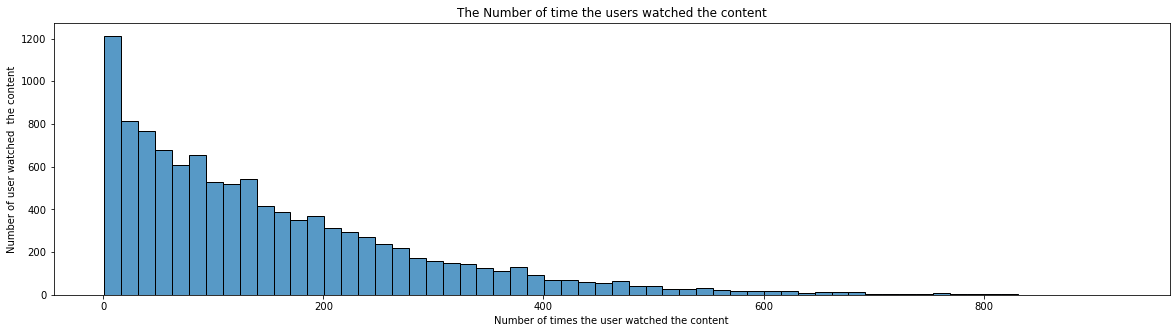

In [26]:
plt.figure(figsize=(20,5))
sns.histplot(content_count['no_contents'])
plt.title("The Number of time the users watched the content")
plt.xlabel("Number of times the user watched the content")
plt.ylabel("Number of user watched  the content")
plt.show()

In [27]:
print("Total Number of users",content_count.shape[0])
print("The Number of users that have watched alteast 10 contents",content_count[content_count['no_contents'] >9].shape[0],"users")

Total Number of users 10923
The Number of users that have watched alteast 10 contents 10111 users


## 4. Test.csv

In [28]:
test = pd.read_csv("../Dataset/test.csv")
print("Number of test users",test.shape[1])
test.head(2)

Number of test users 1


,user_id
0,user_18085@domain.com
1,user_16044@domain.com


In [29]:
test.describe(include='all')

,user_id
count,1440
unique,1440
top,user_12815@domain.com
freq,1


----
----
----
## Data Information from the above (EDA).we came to the conclusion that
The data is in three tables
1. user - independent
2. content - independent
3. relationship - a link to join the both
4. test - containes only the **user_id(email)**


In [30]:
print("User table columns                           :    " ,user.columns)
print("Relationship table columns                :    " ,relationship.columns)
print("Content table columns                      :     " ,content.columns)

User table columns                           :     Index(['user_id', 'user_age', 'gender', 'location', 'joining_date'], dtype='object')
Relationship table columns                :     Index(['user_id', 'content_id', 'duration', 'date', 'start_time', 'end_time'], dtype='object')
Content table columns                      :      Index(['content_id', 'content_type', 'language', 'genre', 'duration',
       'release_date', 'rating', 'episode_count', 'season_count'],
      dtype='object')


----
# Our task in this project is to build the recommendation system
That means we have to sumit **the Top 10 songs can be recommendations** to a particular user,So we have to make an analysis of how to recommend series/movies to the user, so that the user feels/listen/enjoys the series/movies

## Description about each table and what we can get from the each table ? 
1. **Users table** : we can get his/her id, age, gender, location, joining_date, Basically all the information about him/her
2. **content table** : We can get all the inforamtion regarding the series or the movie along with its duration
3. **Relationship table** : we can see the more information about the user interaction  with the content

## Dataset Description for building a recom system
1. The can be used to build a nice recommendation system for the OTT platform according to our choice of wish
     Basically a recommendation needed to be build with a meeaning full purpose such as to increase the user engagement.
2. The recommendation can  be build if these conditions are met. There are upto 10 different series/movies of each

## Domain Knoweledge about the xyz before going to build
1. Before going to recommend series and episodes, here we  can see that there are **no ratial discrimination,  no language discrimination, no age discrimination,nothing** we have to compare, Which means building a recommendation system here is an easy task, all the content that are going to be recommend to a user is from a suffled set from our choice, of questions in order to increase enagagement effectively.
2. No of different types of content : 

## We are going to recommend content are on the following basic
1. First we need to create tables  and use a **sampelling method** to recommend songs to the users randomly.
2. Totally there are **44,200** contents available
3. **Ten content** is enough to build a recommendation system, but there will be no discrimination established between the users. So we need aleast **20,000** records for recommendings songs to users **1440*10 = 14,400** content across realases, ratings and exposure to contents.
4. **Minumum of 14,400** songs are required for our recommendation to work well with users. Here we are going to create a  **20,000** recommending contents
5. The **Content Based Recommendation system** will have the content with are taken from our choice, here i have implemented some eda to find out the best possible songs that can be recommed to a user.
    1. There will be **13** content according to the **lastest releases**
        1. Inside this **six** content will be from the **within 30 days**
        2. **seven** content from the rest of the lastest releases
    2. Ther will be **13** content according to the **Ratings** given by the user
        1. **six** content will be form the ratings **10 and 9** or **10**
        2. **seven** content will the top 20,000/4 = 5,000 records except the top 10 records beacuse i will cause reputations of content problem
    3. There will be 12 content in total from all the all the major content types** ( movies, sports, series and teasers).**
        1. Every **three** content will be from the every **unique major category**
    4. There will be **13** content that are **most watched by the user**
        1. **six** content will be from the **top 50** in the list of **most watched content**
        2. **seven** will be from the other content, since its is a pretty new platform it is ok to recommend from top 5000 in the list except the top 20.
        
##### Latest Release Table(13 contents)
- **Release Date** can be taken from the **content** table

##### Ratings Table(13 contents)
- **Ratings** of the moveis, series, sports, teasers, can be seen from the **content**  table

##### Content type ( movies, series, sports, teasers)(12 contents)
-  **Content Type** can be taken from content table

##### Relationship Table(13 contents)
- "Most watched content"  =count of repeating content id's **content_id**

## Disclaimer
method 1:Here i am planning to fetch records total of **50 contents** to avoid showing the same content; Explanation : As because we are randomply selecting records from the content table for the multiple content items, there might be a problem of showing the same content to the user, So here i will finally show only the unqiue records from my list of **50 contents**


---- 

# Model Building

### a. Release Date

#####  i). What are the contents released in  the past 30 days ? 

In [31]:
fresh_content = content[content['release_date'] > '2020-12-1']
fresh_content = fresh_content['content_id']
fresh_content= fresh_content.sample(7)
print("Last 30 days release\n",fresh_content)

Last 30 days release
 43143      cont_2407_2_2
43730       cont_93_1_10
14911      cont_685_5_11
18522      cont_1561_4_2
11409     cont_2299_4_30
28030    cont_2796_12_13
22021     cont_517_10_13
Name: content_id, dtype: object


##### ii). What are the contents released in  the past 120 days ? 

In [32]:
latest_release =content[(content['release_date'] > '2020-08-1')&(content['release_date'] < '2020-11-30')]
latest_release = latest_release['content_id']
latest_release=latest_release.sample(6)
print("Between 30 to 150 days release \n",latest_release)

Between 30 to 150 days release 
 19482      cont_4716_7_8
18765     cont_3190_20_7
10017    cont_1286_13_31
22427    cont_2876_15_17
35999      cont_2019_8_9
7124      cont_2089_9_18
Name: content_id, dtype: object


### b. User Ratings

##### i). What are the contents that have ratings of 10 ?

In [33]:
ten_rating= content[content['rating'] ==10]
ten_rating = ten_rating['content_id']
ten_rating = ten_rating.sample(7)
print("Top 10 rating content\n",ten_rating)

Top 10 rating content
 35336    cont_4103_3_11
28015    cont_4667_1_42
46925     cont_2792_2_8
27622     cont_1098_8_9
6753     cont_2876_14_7
9263     cont_2946_4_24
3954      cont_357_3_17
Name: content_id, dtype: object


###### ii). What are the top 5,000 contents with the ratings ? 

In [34]:
top_rating = content[(content['rating'] >= 8) & (content['rating'] < 10)].reset_index().drop('index',axis=1).sort_values(by='rating',ascending=False)[:5000]
top_rating = top_rating['content_id']
top_rating = top_rating.sample(6)
print("Top 5000 rating contents\n",top_rating)

Top 5000 rating contents
 4756     cont_882_22_6
4911     cont_2173_5_8
7644      cont_328_4_9
8174    cont_3409_2_17
2679     cont_3542_2_6
2844     cont_2615_1_7
Name: content_id, dtype: object


### c. Content Type

i). Any three from the **Movies**? 

In [35]:
movies = content[content['content_type'] =='movies']
movies = movies['content_id']
movies = movies.sample(3)
print("The movies content ?\n",movies)

The movies content ?
 22592    cont_3452
28440    cont_3733
23925     cont_503
Name: content_id, dtype: object


ii). Any three from the **series** ?

In [36]:
series = content[content['content_type'] =='series']
series = series['content_id']
series =series.sample(3)
print(" The series content?\n",series)

 The series content?
 38453    cont_3405_3_33
31647     cont_3116_6_7
43812    cont_1334_2_34
Name: content_id, dtype: object


iii). Any three from the **sports** ?  

In [37]:
sports = content[content['content_type'] =='sports']
sports=sports['content_id']
sports=sports.sample(3)
print(" The sports content?\n",sports)

 The sports content?
 24073    cont_4262_1_9
13578    cont_3181_1_4
46564    cont_1705_1_9
Name: content_id, dtype: object


iv). Any three from the **teasers** ?

In [38]:
teasers = content[content['content_type'] =='teasers']
teasers = teasers['content_id']
teasers=teasers.sample(3)
print(" The teasers content?\n",teasers)

 The teasers content?
 21429    cont_3625
37787     cont_140
976       cont_326
Name: content_id, dtype: object


### d. Most Watched Content

i). seven content will be from the **top 50** in the list of most watched content

In [39]:
top_50_watched = relationship['content_id'].value_counts().reset_index()[:50]
top_50_watched = top_50_watched.rename(columns={"index" : "content_id" , "content_id" : "no_times"})
top_50_watched = top_50_watched['content_id'] 
top_50_watched= top_50_watched.sample(7)
print("The Top 50 songs\n",top_50_watched)

The Top 50 songs
 0     cont_3497_10_10
27     cont_135_10_12
19     cont_3313_3_29
17     cont_1327_11_9
24       cont_311_3_4
26      cont_4838_5_3
38        cont_81_5_6
Name: content_id, dtype: object


ii). six content will be from the top 5000 contents.

In [40]:
top_5000_watched = relationship['content_id'].value_counts().reset_index()[50:5000]
top_5000_watched = top_5000_watched.rename(columns={"index" : "content_id" , "content_id" : "no_times"})
top_5000_watched = top_5000_watched['content_id']
top_5000_watched = top_5000_watched.sample(6)
print("The Top 5000 songs\n",top_5000_watched)

The Top 5000 songs
 3073      cont_638_1_2
1362     cont_693_1_40
1634    cont_1130_3_30
3614    cont_4499_9_24
2499    cont_4213_24_3
4775     cont_4457_1_3
Name: content_id, dtype: object


## Concating and Building Solution phase

#### Procedure
By choosing **50** contents from the total contents we can say that there will be a **unique** content from the every table and there will be no repeating contents in our system

i). concating

In [41]:
recommending_items = pd.concat([fresh_content,latest_release,ten_rating,top_rating,movies,
                  sports,series,teasers,top_50_watched,top_5000_watched])
recommending_items = recommending_items.reset_index().drop('index',axis=1)

ii). unqiue items

In [42]:
recommendations = recommending_items['content_id'].unique()[:10]

In [43]:
recommendations = recommendations.tolist()
print("The recommendation for a single user\n",recommendations)

The recommendation for a single user
 ['cont_2407_2_2', 'cont_93_1_10', 'cont_685_5_11', 'cont_1561_4_2', 'cont_2299_4_30', 'cont_2796_12_13', 'cont_517_10_13', 'cont_4716_7_8', 'cont_3190_20_7', 'cont_1286_13_31']


## Submission.json

Now our code is working fine, we need to develop a **recommendation system** for all the users available in the test dataset

In [44]:
test = pd.read_csv("../Dataset/test.csv")

In [45]:
submissions = pd.read_json("../Dataset/sample_submission.json")

The Below code is for the **Number of recommendations** for the **Number of records** in the **test** dataset<br>
**It will take time to run**

In [46]:
total_recommendations =[]
for user in range(len(test['user_id'])):
 fresh_content = content[content['release_date'] > '2020-12-1']
 fresh_content = fresh_content['content_id']
 fresh_content= fresh_content.sample(7)

 latest_release =content[(content['release_date'] >  '2020-08-1')&(content['release_date'] < '2020-11-30')]
 latest_release = latest_release['content_id']
 latest_release=latest_release.sample(6)

 ten_rating= content[content['rating'] ==10]
 ten_rating = ten_rating['content_id']
 ten_rating = ten_rating.sample(7)

 top_rating = content[(content['rating'] >= 8) & (content['rating']   < 10)].reset_index().drop('index',axis= 1).sort_values(by='rating',ascending=False)[:5000]
 top_rating = top_rating['content_id']
 top_rating = top_rating.sample(6)

 movies = content[content['content_type'] =='movies']
 movies = movies['content_id']
 movies = movies.sample(3)

 series = content[content['content_type'] =='series']
 series = series['content_id']
 series =series.sample(3)

 sports = content[content['content_type'] =='sports']
 sports=sports['content_id']
 sports=sports.sample(3)

 teasers = content[content['content_type'] =='teasers']
 teasers = teasers['content_id']
 teasers=teasers.sample(3)

 top_50_watched = relationship['content_id'].value_counts().reset_index()[:50]
 top_50_watched = top_50_watched.rename(columns={"index" : "content_id" , "content_id" : "no_times"})
 top_50_watched = top_50_watched['content_id'] 
 top_50_watched= top_50_watched.sample(7)

 top_5000_watched = relationship['content_id'].value_counts().reset_index()[50:5000]
 top_5000_watched = top_5000_watched.rename(columns={"index" : "content_id" , "content_id" : "no_times"})
 top_5000_watched = top_5000_watched['content_id']
 top_5000_watched = top_5000_watched.sample(6)

 recommending_items = pd.concat([fresh_content,latest_release,ten_rating,top_rating,movies,
                  sports,series,teasers,top_50_watched,top_5000_watched])
 recommending_items = recommending_items.reset_index().drop('index',axis=1)

 recommendations = recommending_items['content_id'].unique()[:10]
 recommendations = recommendations.tolist()
 total_recommendations.append(recommendations)

In [47]:
total_recommendations_list = total_recommendations.copy()

In [48]:
test['content_id'] = total_recommendations_list

In [82]:
print("sytem build completed")

sytem build completed


In [58]:
test.to_csv("submission.csv",index=False)

##### Template
{
    "user_34535@domain.com": [
        "cont_2194_5_31",
        "cont_426_1_15",
        "cont_4510_1_9",
        "cont_2738_2_11",
        "cont_1130_7_16",
        "cont_3582_5_1",
        "cont_84_1_17",
        "cont_3472_1_12",
        "cont_1739_3_22",
        "cont_3470_2_17"
    ],
    "user_37100@domain.com": [
        "cont_3451_2_4",
        "cont_4656_4_7",
        "cont_302_1_10",
        "cont_4900_1_37",
        "cont_4168_13_3",
        "cont_524_11_21",
        "cont_4375_2_32",
        "cont_2798_20_6",
        "cont_265_3_24",
        "cont_2394_1_18"
    ]
}

In [85]:
import csv
import json


with open("submission.csv","r") as f:
 reader = csv.reader(f)
 data = {}
 for row in reader : 
        data[row[0]] = row[1].replace("''","")
        
with open("submissions.json", "w") as f:
	json.dump(data,f,indent=4)

## Completed

In [ ]:
## Thankyou for reading the 